In [60]:
import glob

#Numpy
import numpy as np
import scipy

#For image plotting
import skimage.io
import skimage.filters as sf
from skimage import io, measure, filters, transform, morphology

#Matplotlib plotting packages
import matplotlib.pyplot as plt

# For loading bars
from tqdm.notebook import tqdm as tqdm

import pandas as pd

from matplotlib.colors import Normalize
import matplotlib.colors as mcolors
import matplotlib.cm as cm

In [29]:
def data_to_speed(file_dir, uMATP):
    data_stack = []
    acqtime_min = []
    files = np.sort(glob.glob(file_dir))
    for file in files:
        df = pd.read_csv(file)
        
        if len(df)>30:
            
            df = df.drop('Unnamed: 0', axis=1)
            df = df.drop('index', axis=1)
            df['uMATP'] = np.ones(len(df))*uMATP
            
            time = float(file.split('_')[1].split('min')[0])
            acqtime_min.append(time)

            df['acqtime'] = np.ones(len(df))*time
            data_stack.append(df)
        
    data_stack = np.array(data_stack, dtype=pd.DataFrame)
    acqtime_min = np.array(acqtime_min)

    speeds = []
    for df in data_stack:
        speed = np.average(df['speed (nm/s)'])
        speeds.append(speed)
    speeds = np.array(speeds)
    
    data_stack = pd.concat(data_stack, axis=0)
    return acqtime_min, speeds, data_stack

In [30]:
file_folder = '940/'
included_files = '*940*.csv'
file_dir = file_folder+included_files
time940, speeds940, df940 = data_to_speed(file_dir, 940)

file_folder = '353/'
included_files = '*353*.csv'
file_dir = file_folder+included_files
time353, speeds353, df353 = data_to_speed(file_dir, 353)

file_folder = '176/'
included_files = '*176*.csv'
file_dir = file_folder+included_files
time176, speeds176, df176 = data_to_speed(file_dir, 176)

file_folder = '1410/'
included_files = '*1410*.csv'
file_dir = file_folder+included_files
time1410, speeds1410, df1410 = data_to_speed(file_dir, 1410)

file_folder = '470/'
included_files = '*470*.csv'
file_dir = file_folder+included_files
time470, speeds470, df470 = data_to_speed(file_dir, 470)

In [32]:
df_master = pd.concat([df1410, df940, df470, df353, df176], axis=0)
df_master

,area,major_axis_length,minor_axis_length,centroid-0,centroid-1,orientation,eccentricity,label,perimeter,proj#,speed (nm/s),r^2,num points,uMATP,acqtime
0,21,28.339875,1.363182,17.000000,180.857143,-0.546588,0.998842,1,23.556349,0.0,54.769346,0.951241,85,1410.0,11.5
1,24,29.838712,1.727599,48.500000,422.500000,-0.382605,0.998323,11,25.727922,0.0,31.688348,0.866967,130,1410.0,11.5
2,17,21.233519,1.060101,69.000000,285.470588,-0.395833,0.998753,18,17.485281,0.0,36.269318,0.818956,152,1410.0,11.5
3,25,31.487245,1.793274,129.560000,387.000000,1.157448,0.998377,43,26.727922,0.0,91.865688,0.899554,75,1410.0,11.5
4,26,30.102964,3.382997,282.500000,419.115385,-0.083261,0.993665,103,25.863961,0.0,74.844800,0.871436,65,1410.0,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,26,34.589491,2.238498,297.500000,312.923077,0.522219,0.997904,60,29.384776,4.0,39.744074,0.938948,100,176.0,9.0
85,26,27.533497,2.949477,392.153846,292.884615,-0.192382,0.994246,77,25.278175,4.0,50.352477,0.916151,99,176.0,9.0
86,25,30.630234,1.310863,428.120000,226.000000,1.227312,0.999084,86,26.313708,4.0,73.695666,0.956521,49,176.0,9.0
87,14,18.126001,1.186292,443.500000,431.357143,0.475476,0.997856,91,14.485281,4.0,50.875316,0.917451,90,176.0,9.0


In [53]:
df_grouped = df_master.groupby(['uMATP', 'acqtime']).mean().reset_index()
df_grouped
#df.groupby(["gender", "insomnia"]).median()

,uMATP,acqtime,area,major_axis_length,minor_axis_length,centroid-0,centroid-1,orientation,eccentricity,label,perimeter,proj#,speed (nm/s),r^2,num points
0,176.0,1.0,21.059406,25.235661,2.392889,334.226438,313.493280,0.070063,0.993302,99.396040,22.127349,2.069307,53.726493,0.883713,93.039604
1,176.0,3.0,23.309091,27.388108,2.371174,269.070679,252.583492,-0.092041,0.993447,63.300000,24.348568,1.945455,62.341062,0.900986,87.918182
2,176.0,5.0,21.373494,25.882466,2.099511,259.379231,256.159707,0.110999,0.995677,52.433735,22.490652,2.096386,53.660587,0.892285,91.518072
3,176.0,7.0,23.735849,28.289757,2.274490,234.085456,273.876791,0.112711,0.994876,52.235849,25.180139,1.867925,48.475293,0.890622,92.886792
4,176.0,9.0,23.471910,27.508229,2.453485,270.697800,276.528326,0.309649,0.993770,54.134831,24.589155,1.966292,53.934020,0.904419,88.775281
5,176.0,11.0,21.354839,27.117063,1.675992,266.442932,233.007921,0.086845,0.997281,58.924731,22.981849,1.817204,51.296863,0.898830,90.946237
6,176.0,13.0,25.898734,31.109504,2.480936,286.772621,269.931507,-0.114814,0.994243,52.582278,28.069117,2.113924,49.281797,0.891926,90.240506
7,176.0,16.0,20.508547,24.438577,2.015391,265.279130,219.582842,0.161666,0.993572,71.341880,21.327327,2.081197,64.594545,0.913792,85.089744
8,176.0,18.0,22.215385,27.100545,1.943725,276.447254,232.306791,0.187011,0.996167,70.538462,23.413420,1.938462,60.811294,0.917238,87.856410
9,353.0,2.0,22.052632,27.142434,2.493482,301.806177,231.599951,0.239944,0.993751,56.894737,23.838182,1.921053,54.747105,0.875419,89.210526


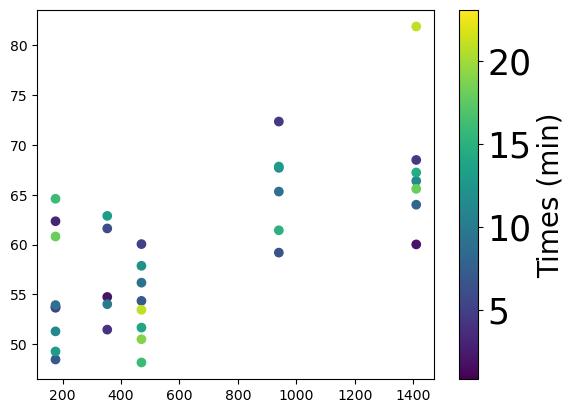

In [90]:
fig, ax = plt.subplots()
# setup the normalization and the colormap
normalize = mcolors.Normalize(vmin=0.8*df_grouped['acqtime'].min(), vmax=1.1*df_grouped['acqtime'].max())
colormap = cm.viridis
scalarmappable = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappable.set_array(df_grouped['acqtime'])

ax.scatter(df_grouped['uMATP'], df_grouped['speed (nm/s)'], color = colormap(normalize(df_grouped['acqtime'])))
#plt.xlabel=('ATP Concentration (uM)')
#ax.set_ylabel=('Speed (nm/s)')

cbar = fig.colorbar(scalarmappable)
cbar.ax.tick_params(labelsize=25)
cbar.set_label(label="Times (min)", size=20)

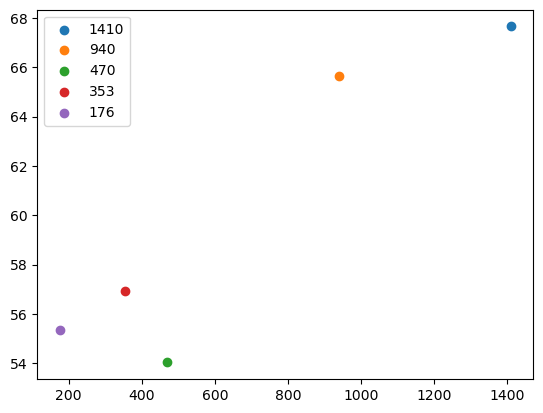

In [91]:
plt.scatter(1410, np.average(speeds1410), label='1410')
plt.scatter(940, np.average(speeds940), label='940')
plt.scatter(470, np.average(speeds470), label='470')
plt.scatter(353, np.average(speeds353), label='353')
plt.scatter(176, np.average(speeds176), label='176')
plt.legend()

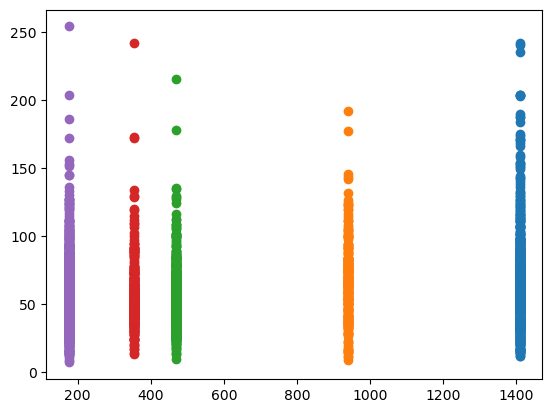

In [36]:
plt.scatter(df_master[df_master['uMATP']==1410]['uMATP'], df_master[df_master['uMATP']==1410]['speed (nm/s)'])
plt.scatter(df_master[df_master['uMATP']==940]['uMATP'], df_master[df_master['uMATP']==940]['speed (nm/s)'])
plt.scatter(df_master[df_master['uMATP']==470]['uMATP'], df_master[df_master['uMATP']==470]['speed (nm/s)'])
plt.scatter(df_master[df_master['uMATP']==353]['uMATP'], df_master[df_master['uMATP']==353]['speed (nm/s)'])
plt.scatter(df_master[df_master['uMATP']==176]['uMATP'], df_master[df_master['uMATP']==176]['speed (nm/s)'])

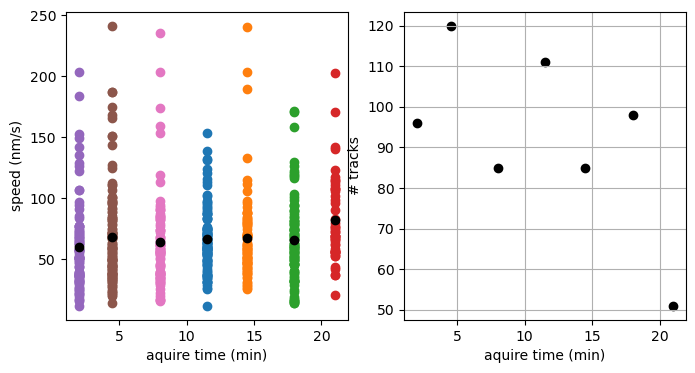

In [11]:
fig, ax = plt.subplots(1,2, figsize = (8,4))
for df in df1410:
    ax[0].scatter(df['acqtime'], df['speed (nm/s)'])
    ax[0].scatter(np.average(df['acqtime']), np.average(df['speed (nm/s)']), color='k')
    
    ax[1].scatter(np.average(df['acqtime']), len(df), color='k')

ax[0].set_xlabel('aquire time (min)')
ax[0].set_ylabel('speed (nm/s)')
ax[1].set_xlabel('aquire time (min)')
ax[1].set_ylabel('# tracks')
ax[1].grid(True)

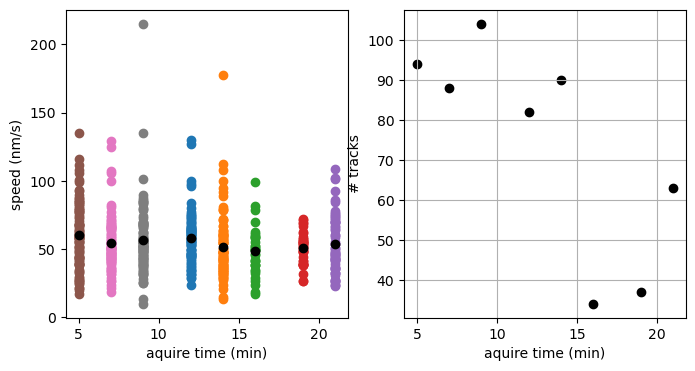

In [14]:
fig, ax = plt.subplots(1,2, figsize = (8,4))
for df in df470:
    ax[0].scatter(df['acqtime'], df['speed (nm/s)'])
    ax[0].scatter(np.average(df['acqtime']), np.average(df['speed (nm/s)']), color='k')
    
    ax[1].scatter(np.average(df['acqtime']), len(df), color='k')

ax[0].set_xlabel('aquire time (min)')
ax[0].set_ylabel('speed (nm/s)')
ax[1].set_xlabel('aquire time (min)')
ax[1].set_ylabel('# tracks')
ax[1].grid(True)

In [102]:
np.average([66.38266619, 67.2297352 , 65.58773532, 81.87335617,
       60.01711526, 68.48562492, 63.99922983])

67.65363755571428

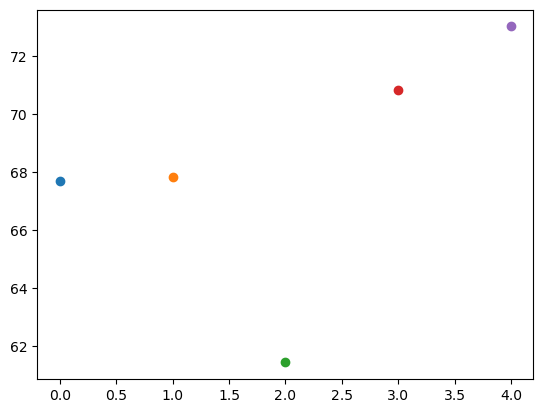

In [71]:
# plt.scatter(df940[0]['proj#'], df940[0]['speed (nm/s)'])
# plt.scatter(df940[1]['proj#'], df940[1]['speed (nm/s)'])
# plt.scatter(df940[2]['proj#'], df940[2]['speed (nm/s)'])
# plt.scatter(df940[3]['proj#'], df940[3]['speed (nm/s)'])
# plt.scatter(df940[4]['proj#'], df940[4]['speed (nm/s)'])

plt.scatter(0, np.average(df940[0]['speed (nm/s)']))
plt.scatter(1, np.average(df940[1]['speed (nm/s)']))
plt.scatter(2, np.average(df940[2]['speed (nm/s)']))
plt.scatter(3, np.average(df940[3]['speed (nm/s)']))
plt.scatter(4, np.average(df940[4]['speed (nm/s)']))

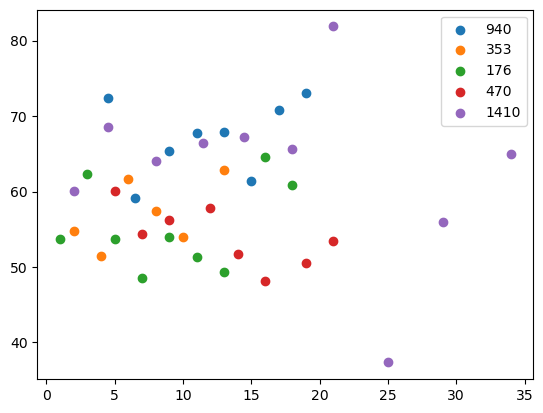

In [56]:
plt.scatter(time940, speeds940, label = '940')
plt.scatter(time353, speeds353, label = '353')
plt.scatter(time176, speeds176, label = '176')
plt.scatter(time470, speeds470, label = '470')
plt.scatter(time1410, speeds1410, label = '1410')
plt.legend()

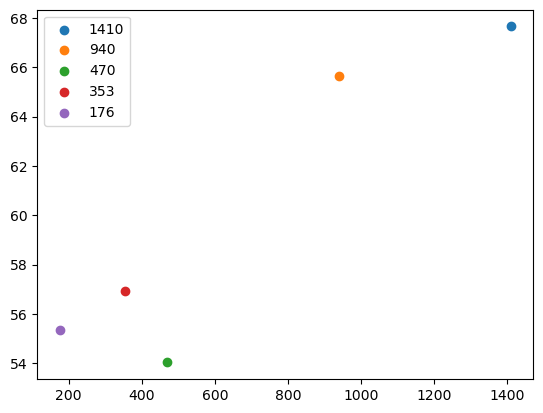

In [13]:
plt.scatter(1410, np.average(speeds1410), label='1410')
plt.scatter(940, np.average(speeds940), label='940')
plt.scatter(470, np.average(speeds470), label='470')
plt.scatter(353, np.average(speeds353), label='353')
plt.scatter(176, np.average(speeds176), label='176')
plt.legend()

In [14]:
speeds = []
for df in data_stack:
    speed = np.average(df['speed (nm/s)'])
    speeds.append(speed)
speeds = np.array(speeds)

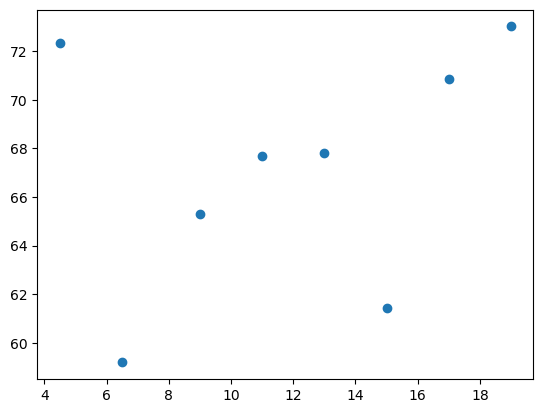

In [27]:
plt.scatter(acqtime_min, speeds)

In [15]:
speeds

array([67.69652685, 67.82455507, 61.43253073, 70.83388149, 73.01245611,
       72.33980548, 59.19378416, 65.31697015])

In [13]:
data_stack[0]

,area,major_axis_length,minor_axis_length,centroid-0,centroid-1,orientation,eccentricity,label,perimeter,proj#,speed (nm/s),r^2,num points
0,23,26.755274,1.876212,148.869565,70.391304,-0.272962,0.997538,35,23.727922,0.0,75.535472,0.936843,75
1,27,26.205858,4.971446,240.925926,87.518519,-0.108223,0.981841,65,26.692388,0.0,28.443386,0.964222,100
2,25,27.603083,4.107676,237.080000,181.280000,-1.153208,0.988865,67,26.349242,0.0,59.210955,0.850608,71
3,12,13.931650,1.800685,259.500000,177.500000,-0.134352,0.991612,74,11.863961,0.0,36.937352,0.831337,100
4,24,27.776881,3.711904,472.000000,256.500000,1.490391,0.991031,149,24.071068,0.0,82.531312,0.977141,60
5,34,28.699077,6.413895,135.941176,156.647059,0.354490,0.974707,32,37.420310,1.0,55.694787,0.917725,100
6,21,27.501950,1.987753,156.952381,66.380952,-0.517595,0.997385,39,23.142136,1.0,83.518459,0.888399,100
7,35,32.247271,7.276412,173.857143,41.857143,-0.014692,0.974210,42,36.763456,1.0,63.510531,0.974459,100
8,28,25.361996,6.267326,242.107143,88.714286,-0.102081,0.968986,71,26.656854,1.0,33.841493,0.928347,100
9,16,18.616213,1.853807,261.500000,177.000000,-0.138750,0.995030,80,15.449747,1.0,33.719273,0.854879,100
